## CLUSTERING

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv("../data/data.csv")
df = df.iloc[:, 4:]
df.head(2)

,A_KEY_TIME_MEAN,BOTH_DEV_CC_COUNT,BOTH_DEV_C_COUNT,BOTH_DEV_M_COUNT,CLUSTERED_KEYS,CLUSTERED_NR_KEYS,CLUSTERED_R_KEYS,DELETE_KEY,DELETE_KEYS,GAP_D1,...,MULTIPLE_KEYS_UP_D3,MULTIPLE_KEYS_UP_D4,MULTIPLE_KEYS_UP_D5,MULTIPLE_KEYS_UP_D6,MULTIPLE_KEYS_UP_D7,MULTIPLE_KEYS_UP_D8,MULTIPLE_KEYS_UP_D9,R_DELETE,R_DELETE_FREQ,S_KEY_TIME_MEAN
0,0.125,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.027,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
1,0.116,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.046,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN


### Feature selection
We make a use of feature selection part and subset only columns with variance above 0.16 threshold

In [3]:
cols_with_high_variance = [False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False]

In [4]:
df_filtered = df.loc[:, cols_with_high_variance]
print(df_filtered.shape)
df_filtered.head(2)

(21804, 55)


,DELETE_KEYS,GAP_D9,GAP_SD,KEY_COUNT,KEY_GAP_TIME_D7,KEY_GAP_TIME_D8,KEY_GAP_TIME_D9,MOUSE_COUNT,MOUSE_DIR_D1,MOUSE_DIR_D2,...,MULTIPLE_KEYS_DOWN_D9,MULTIPLE_KEYS_UP,MULTIPLE_KEYS_UP_D2,MULTIPLE_KEYS_UP_D3,MULTIPLE_KEYS_UP_D4,MULTIPLE_KEYS_UP_D5,MULTIPLE_KEYS_UP_D6,MULTIPLE_KEYS_UP_D7,MULTIPLE_KEYS_UP_D8,MULTIPLE_KEYS_UP_D9
0,NaN,0.204,0.383,13.0,0.265,0.336,0.341,7,35.665,35.665,...,1.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
1,NaN,0.174,1.933,18.0,0.252,0.336,0.439,13,35.665,35.665,...,1.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0


### Clustering with KMeans

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


Silhouette score: 0.3822826786149468
Within-cluster sum of squares: 22808091183.772247


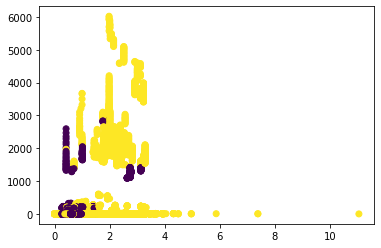

In [27]:
num_clusters = 2

df_filtered = df_filtered.fillna(0)

# Instantiate the KMeans algorithm with the number of clusters
kmeans = KMeans(n_clusters=num_clusters)

df_filtered['label_kmean'] = kmeans.fit_predict(df_filtered)


# Calculate the silhouette score
score = silhouette_score(df_filtered, df_filtered['label_kmean'])
print(f"Silhouette score: {score}")

# Calculate the WSS
wss = kmeans.inertia_
print(f"Within-cluster sum of squares: {wss}")

# Visualize the data and the clusters
plt.scatter(df_filtered['GAP_D9'], df_filtered['GAP_SD'], c=df_filtered['label_kmean'])
plt.show()

In [28]:
df_filtered.columns

Index(['DELETE_KEYS', 'GAP_D9', 'GAP_SD', 'KEY_COUNT', 'KEY_GAP_TIME_D7',
       'KEY_GAP_TIME_D8', 'KEY_GAP_TIME_D9', 'MOUSE_COUNT', 'MOUSE_DIR_D1',
       'MOUSE_DIR_D2', 'MOUSE_DIR_D3', 'MOUSE_DIR_D4', 'MOUSE_DIR_D5',
       'MOUSE_DIR_D6', 'MOUSE_DIR_D7', 'MOUSE_DIR_D8', 'MOUSE_DIR_D9',
       'MOUSE_DIST_D5', 'MOUSE_DIST_D6', 'MOUSE_DIST_D7', 'MOUSE_DIST_D8',
       'MOUSE_DIST_D9', 'MOUSE_GAP_D2', 'MOUSE_GAP_D3', 'MOUSE_GAP_D4',
       'MOUSE_GAP_D5', 'MOUSE_GAP_D6', 'MOUSE_GAP_D7', 'MOUSE_GAP_D8',
       'MOUSE_GAP_D9', 'MOUSE_SPEED_D4', 'MOUSE_SPEED_D5', 'MOUSE_SPEED_D6',
       'MOUSE_SPEED_D7', 'MOUSE_SPEED_D8', 'MOUSE_SPEED_D9',
       'MULTIPLE_KEYS_DOWN', 'MULTIPLE_KEYS_DOWN_D1', 'MULTIPLE_KEYS_DOWN_D2',
       'MULTIPLE_KEYS_DOWN_D3', 'MULTIPLE_KEYS_DOWN_D4',
       'MULTIPLE_KEYS_DOWN_D5', 'MULTIPLE_KEYS_DOWN_D6',
       'MULTIPLE_KEYS_DOWN_D7', 'MULTIPLE_KEYS_DOWN_D8',
       'MULTIPLE_KEYS_DOWN_D9', 'MULTIPLE_KEYS_UP', 'MULTIPLE_KEYS_UP_D2',
       'MULTIPLE_KEYS_UP_D3

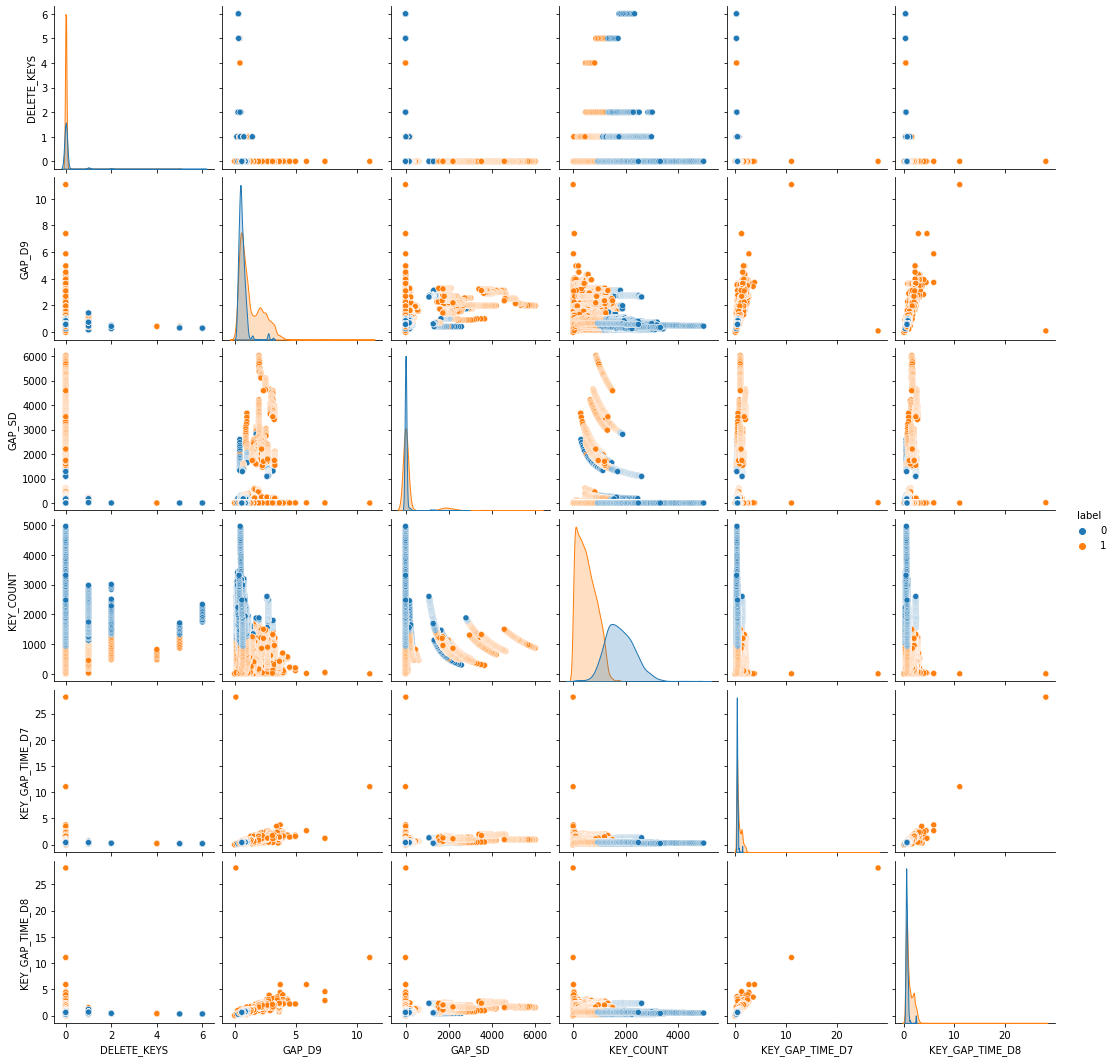

In [33]:
sns.pairplot(df_filtered, hue = "label_kmean", vars=['DELETE_KEYS', 'GAP_D9', 'GAP_SD', 'KEY_COUNT', 'KEY_GAP_TIME_D7',
       'KEY_GAP_TIME_D8'])

### DBSCAN

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [76]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Perform DBSCAN clustering with 2 clusters
min_samples = len(df_filtered) // 2  # Set min_samples to be half the number of samples
dbscan = DBSCAN(eps=7, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)

# Add cluster labels to original DataFrame
df_filtered['label_dbscan'] = clusters

# Analyze the clusters
cluster_means = df_filtered.groupby('label_dbscan').mean()

In [77]:
# Calculate silhouette score
silhouette = silhouette_score(df_scaled, clusters)
print('Silhouette score:', silhouette)

# Calculate within-cluster sum of squares (WSS)
cluster_centers = []
for cluster_label in set(clusters):
    if cluster_label != -1:  # Ignore noise points
        cluster_centers.append(df_scaled[clusters == cluster_label].mean(axis=0))
wss = 0
for i, cluster_center in enumerate(cluster_centers):
    wss += ((df_scaled[clusters == i] - cluster_center) ** 2).sum()
print('WSS:', wss)

Silhouette score: 0.2775771059683403
WSS: 552745.7124513848


In [79]:
pd.Series(clusters).value_counts()

 0    17209
-1     4595
dtype: int64

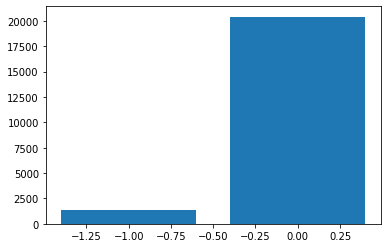

In [72]:
# Plot cluster sizes
cluster_sizes = pd.Series(clusters).value_counts()
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.show()

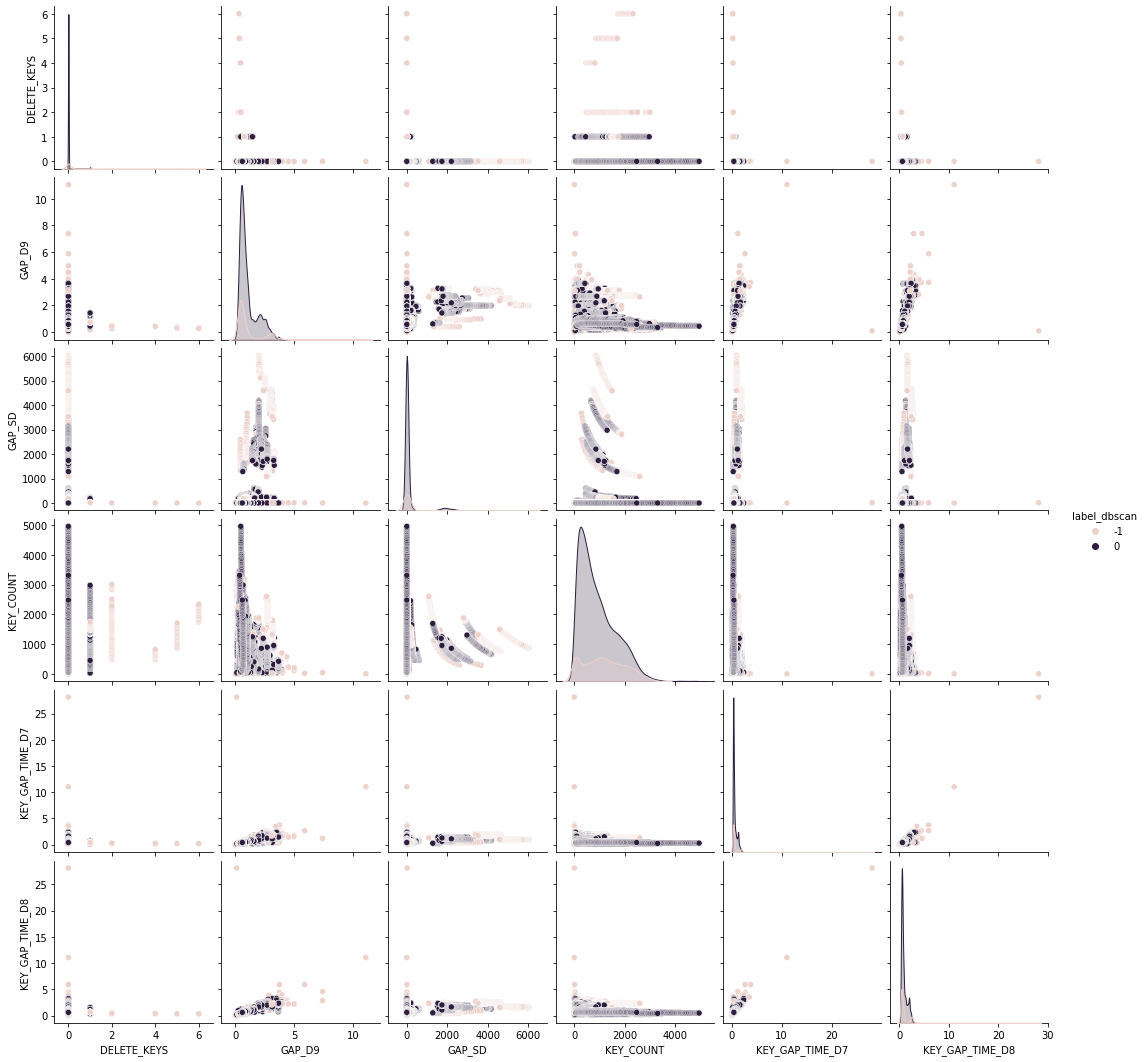

In [78]:
sns.pairplot(df_filtered, hue = "label_dbscan", vars=['DELETE_KEYS', 'GAP_D9', 'GAP_SD', 'KEY_COUNT', 'KEY_GAP_TIME_D7',
       'KEY_GAP_TIME_D8'])